In [27]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [28]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



     lp__  accept_stat__    lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]
0     0.0            0.0  188.2540     166.0     207.0     198.0     208.0
1     0.0            0.0   30.5424      21.0      23.0      26.0      34.0
2     0.0            0.0   56.3741      75.0      42.0      77.0      59.0
3     0.0            0.0   42.7247      45.0      42.0      39.0      48.0
4     0.0            0.0   10.4505      15.0      13.0      12.0       5.0
..    ...            ...       ...       ...       ...       ...       ...
995   0.0            0.0   37.6502      46.0      42.0      47.0      55.0
996   0.0            0.0   25.4943      23.0      27.0      28.0      22.0
997   0.0            0.0   45.4313      44.0      38.0      47.0      52.0
998   0.0            0.0   88.9903      86.0      97.0      92.0      89.0
999   0.0            0.0   14.8728      12.0      10.0      13.0      10.0

[1000 rows x 7 columns]


array([[<AxesSubplot:title={'center':'y_sim[4]'}>]], dtype=object)

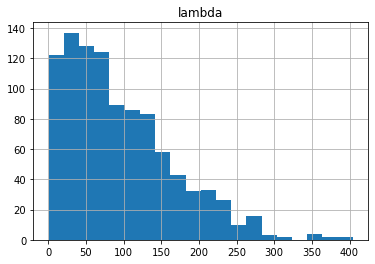

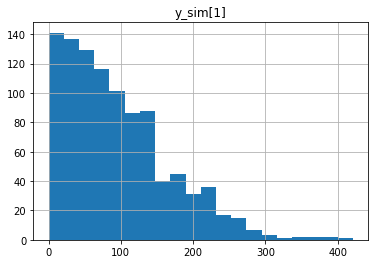

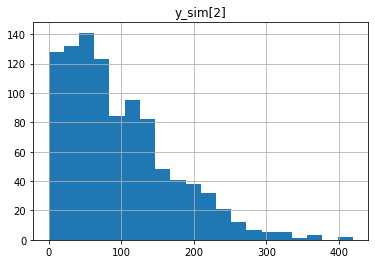

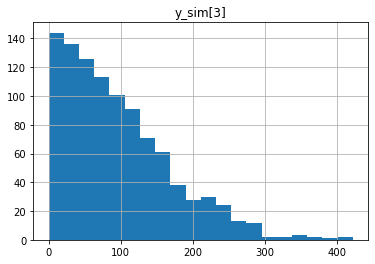

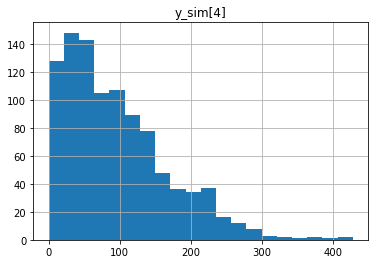

In [29]:
samples = gen_quant.sample(data={'M':4}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

df = samples.draws_pd()
print(df)

N_bins = 20
df.hist('lambda', bins = N_bins)
df.hist('y_sim[1]', bins = N_bins)
df.hist('y_sim[2]', bins = N_bins)
df.hist('y_sim[3]', bins = N_bins)
df.hist('y_sim[4]', bins = N_bins)

## Excercise 2 - Constraints on the data 

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


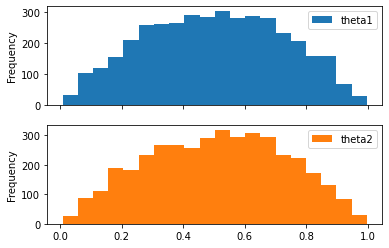

In [30]:
# first model
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

# second model
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

theta1 = samp_bern1.stan_variable('theta')
theta2 = samp_bern2.stan_variable('theta')

df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True, bins=20)
plt.show()

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [31]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█▉        | 00:00 Iteration: 1100 / 7000 [ 15%]  (Sampling)


chain 1 |████▎     | 00:00 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |██████▋   | 00:00 Iteration: 4500 / 7000 [ 64%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 6200 / 7000 [ 88%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_4-20220609004124_1.csv, C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_4-20220609004124_2.csv, C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_4-20220609004124_3.csv, C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_4-20220609004124_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

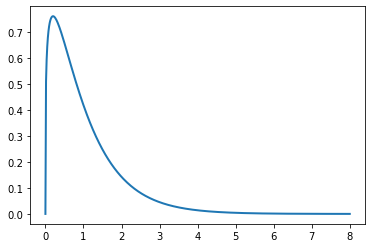

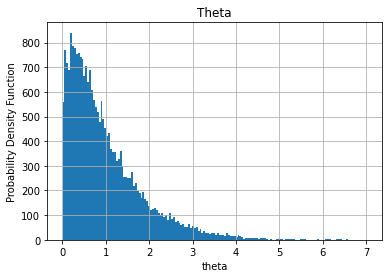

In [32]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
theta1 = out_gamma1.stan_variable('theta')
df = pd.DataFrame({'Theta': theta1})
df.hist(bins = 160)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [33]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |███▍      | 00:00 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███████   | 00:00 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_5-20220609004128_1.csv, C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_5-20220609004128_2.csv, C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_5-20220609004128_3.csv, C:\\Users\\awitc\\Desktop\\DataAnalytics\\Lab2\\samples\\code_5-20220609004128_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

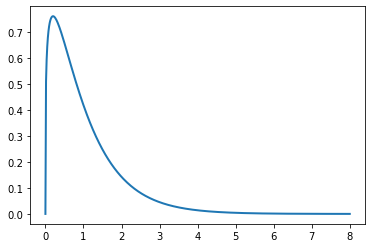

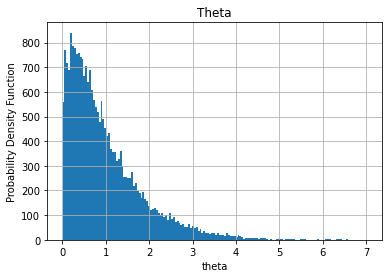

In [34]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
theta2 = out_gamma1.stan_variable('theta')
df = pd.DataFrame({'Theta': theta2})
df.hist(bins = 160)


plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [35]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 4
L = 7
y0 = 0.5

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

df = tunes.draws_pd()
df


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.13523


## Excercise 5 - different methods of defining models


In [36]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 27091999
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


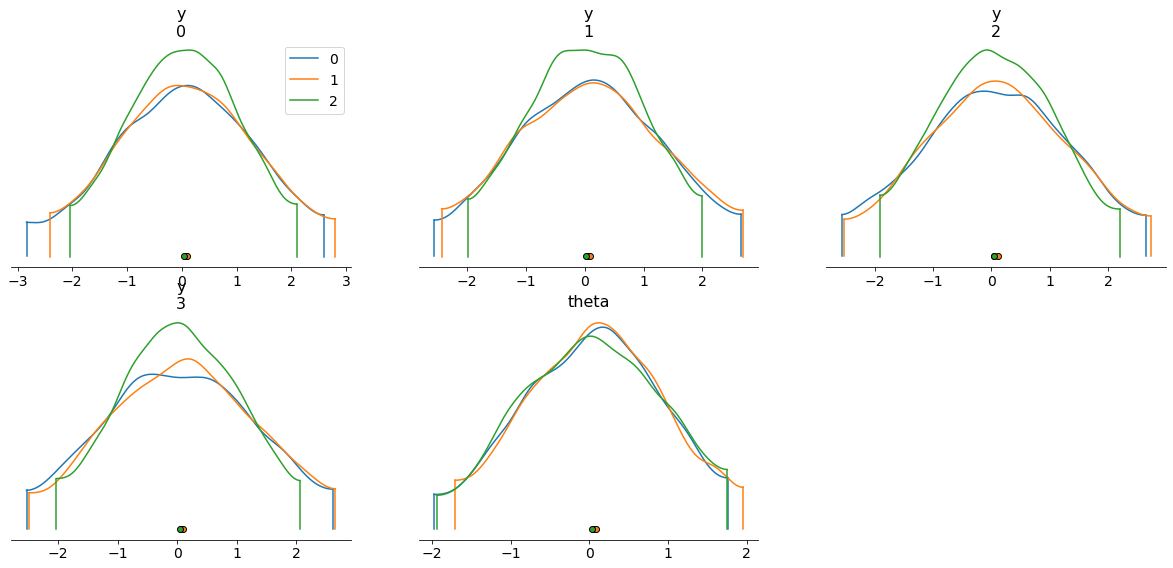

In [37]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


array([[<AxesSubplot:title={'center':'mean_y'}>]], dtype=object)

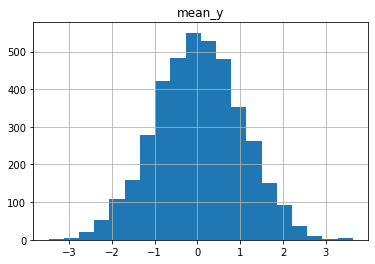

In [38]:
model_gq = CmdStanModel(stan_file='code_10.stan')

# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)

# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()
df.hist(bins = 20)